In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
paths = "/content/drive/MyDrive/Cloud Course Data/Project/Comments_data/"

In [ ]:
videos = pd.read_csv(paths+'USvideos.csv',encoding='utf8',error_bad_lines = False);#opening the file USvideos
comm = pd.read_csv(paths+'UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

<ipython-input-4-432c37fb0f00>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  videos = pd.read_csv(paths+'USvideos.csv',encoding='utf8',error_bad_lines = False);#opening the file USvideos
Skipping line 2401: expected 11 fields, saw 21
Skipping line 2800: expected 11 fields, saw 21
Skipping line 5297: expected 11 fields, saw 12
Skipping line 5299: expected 11 fields, saw 12
Skipping line 5300: expected 11 fields, saw 12
Skipping line 5301: expected 11 fields, saw 12

<ipython-input-4-432c37fb0f00>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comm = pd.read_csv(paths+'UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skippi

In [ ]:
sentiment=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        sentiment.append(analysis.sentiment.polarity)
        
    except:
        sentiment.append(0)
comm['sentiment']=sentiment

comm['pol'][comm.sentiment==0]= 0

comm['pol'][comm.sentiment > 0]= 1
comm['pol'][comm.sentiment < 0]= -1        

<ipython-input-45-a557ec70b493>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.sentiment==0]= 0
<ipython-input-45-a557ec70b493>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.sentiment > 0]= 1
<ipython-input-45-a557ec70b493>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.sentiment < 0]= -1


In [ ]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)        

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,2Hz4sDjXPQY,118,36,133,287
1,rtk-BLeHv6M,109,49,242,400
2,vb_hwwmiKvQ,2,2,7,11
3,kbvS-aeEi-8,79,17,104,200
4,_yt7xexSbfI,50,12,38,100
5,dYstFRuPz8A,181,152,267,600


In [ ]:
df_unique.to_csv('/content/drive/MyDrive/Cloud Course Data/Project/CleanedDataset2/unique.csv',index=False,)

In [ ]:
print(videos.video_id.value_counts()[:12]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:12].index

Oo0NJsr5m4I    8
LunHybOKIjU    8
Hlt3rA-oDao    8
XpVt6Z1Gjjo    7
iALfvFpcItE    7
j5YSOabmFgw    7
OlI8r3nNUVw    7
oKzFGhlFqqE    7
bu9e410C__I    7
UXdbCReBTR8    7
odhMmAPDc54    7
DeTu8xSGpEM    7
Name: video_id, dtype: int64


In [ ]:
videos[videos.video_id=='mlxdnyfkWKQ']

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1647,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93109,1642,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1650,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93153,1644,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1855,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],115720,1747,89,313,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,22.09
2129,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],135303,1781,92,252,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,23.09
2337,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],141666,1790,94,254,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,24.09
2561,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,161606,1823,97,257,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,25.09
2790,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,201549,1944,101,260,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,26.09


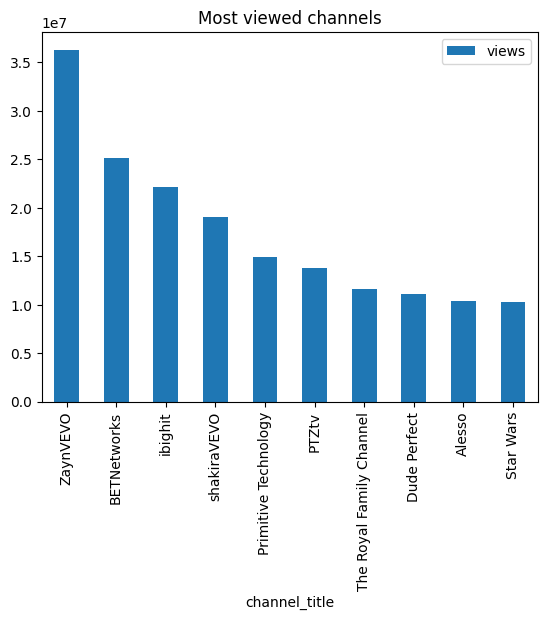

In [ ]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most viewed channels');

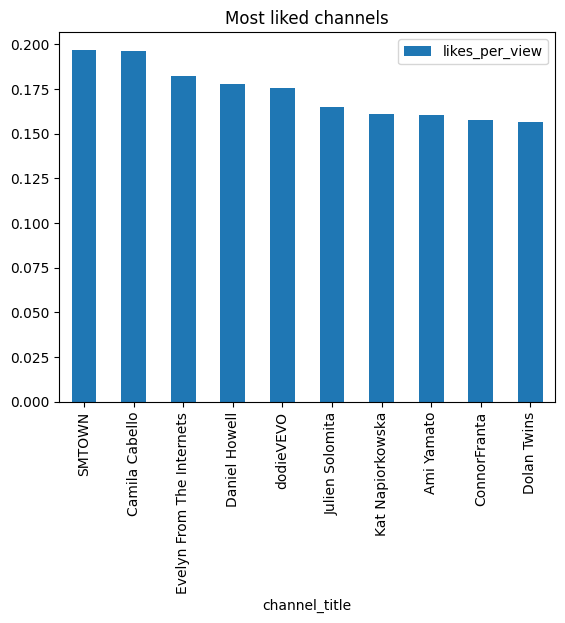

In [ ]:
videos['likes_per_view']=videos['likes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes_per_view'].mean()).sort_values(by='likes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

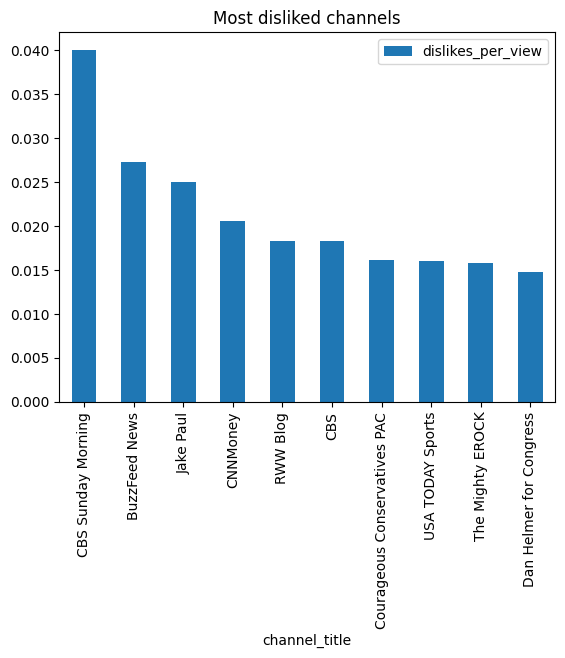

In [ ]:
videos['dislikes_per_view']=videos['dislikes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['dislikes_per_view'].mean()).sort_values(by='dislikes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most disliked channels');

In [ ]:
unique = pd.read_csv('/content/drive/MyDrive/Cloud Course Data/Project/CleanedDataset2/unique.csv',)
unique.sort_values(by='pos_comm',ascending=False).head(5)

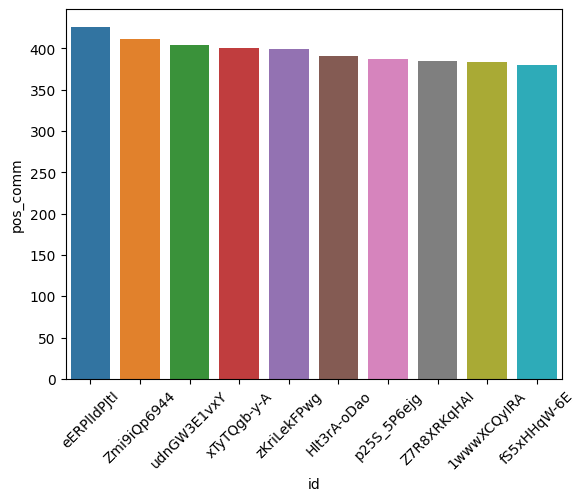

<Figure size 500x400 with 0 Axes>

In [ ]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

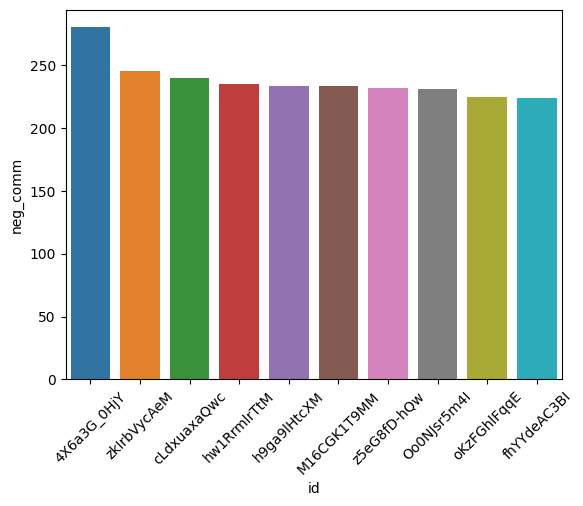

<Figure size 500x400 with 0 Axes>

In [ ]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

In [ ]:
videos

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,likes_per_view,dislikes_per_view
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,0.072838,0.001350
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,0.023645,0.003394
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,0.098633,0.006804
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,0.009453,0.001719
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,0.082753,0.000486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10,0.032612,0.000886
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10,0.022686,0.013629
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10,0.049598,0.000476
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10,0.087559,0.003139


In [ ]:
videos_top_100_views = videos.nlargest(100, 'views')
videos_top_100_with_comments = videos_top_100_views.merge(comm, how = 'inner', on='video_id', suffixes = ['_video', '_comment'])
videos_top_100_with_comments.head(3)

,video_id,title,channel_title,category_id,tags,views,likes_video,dislikes,comment_total,thumbnail_link,date,likes_per_view,dislikes_per_view,comment_text,likes_comment,replies,pol,sentiment
0,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,0.048442,0.001881,"I'm crying, this got over 20 million views <3",0,0,1.0,0.400000
1,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,0.048442,0.001881,It's 3am here got an hour left. It's ok if we ...,0,0,1.0,0.321528
2,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,0.048442,0.001881,......I have replayed this MV ....too much and...,0,0,-1.0,-0.212500


In [ ]:
grouped_by_videos = videos_top_100_with_comments.groupby('video_id').agg({'views' : 'mean', 'sentiment':'mean', 'likes_video' : 'mean'})
grouped_by_videos.head()

,views,sentiment,likes_video
video_id,,,
1NyMSWqIJDQ,1.023587e+07,0.036823,343985.500000
3y5A4paFOb4,1.424192e+07,0.083612,996757.666667
5ggZ9jIHnr8,1.221788e+07,0.046448,562234.400000
8ndhidEmUbI,9.234157e+06,0.037980,67909.250000
APHgDFRpCi0,1.145494e+07,0.059105,401417.200000


<Axes: xlabel='sentiment'>

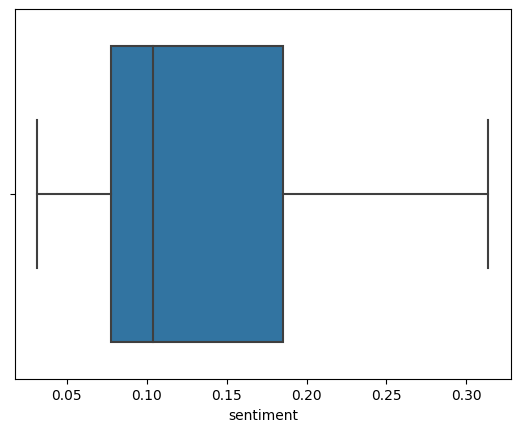

In [ ]:
import seaborn as sns
sns.boxplot(data = grouped_by_videos, x = 'sentiment')

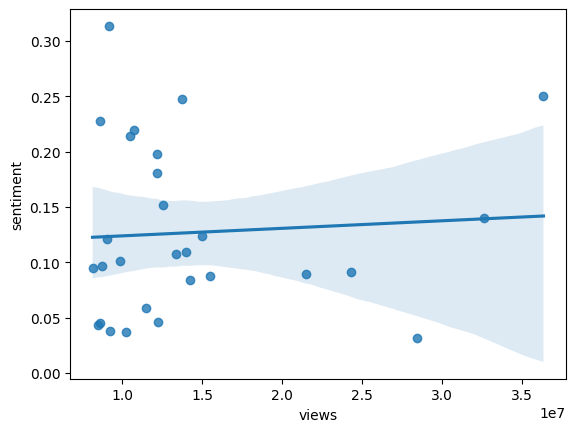

In [ ]:
sns.regplot(data = grouped_by_videos, x = 'views', y = 'sentiment')
plt.show()

In [ ]:
grouped_by_videos['views'].corr(grouped_by_videos['sentiment'])

0.06645302804496307

<Axes: xlabel='likes_video', ylabel='sentiment'>

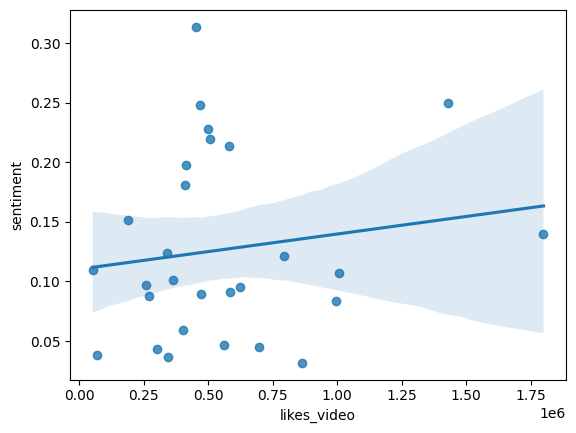

In [ ]:
sns.regplot(data = grouped_by_videos, x = 'likes_video', y = 'sentiment')

In [ ]:
grouped_by_videos['likes_video'].corr(grouped_by_videos['sentiment'])

0.1473370243632883